In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = 'https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv'

In [3]:
!wget $data

--2024-11-04 20:46:53--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-04 20:46:53--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv’

jamb_exam_results.c 100%[===================>] 382.33K  --.-KB/s    in 0.006s  

2024-11-04 20:46:54 (59.4 MB/s) - ‘jamb_exam_result

In [4]:
!head jamb_exam_results.csv

JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,None,1
182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1
202,25,85,2,13.6,Public,Urban,Yes,No,Medium,Low,6,15,Male,Low,Tertiary,1
251,35,85,4,2.6,Public,Urban,No,Yes,Low,Medium,7,16,Female,Medium,Primary,4
129,27,75,3,9.4,Public,Urban,No,Yes,Low,Medium,8,19,Female,Low,Tertiary,3
220,23,85,3,4.6,Public,Rural,No,No,Low,Medium,9,19,Female,Medium,Tertiary,1


In [5]:
df = pd.read_csv(data)

In [73]:
df

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,public,urban,yes,yes,high,medium,17,male,low,tertiary,2
1,207,14,88,4,2.7,public,rural,no,yes,high,high,15,male,high,0,1
2,182,29,87,2,9.6,public,rural,yes,yes,high,medium,20,female,high,tertiary,2
3,210,29,99,2,2.6,public,urban,no,yes,medium,high,22,female,medium,tertiary,1
4,199,12,98,3,8.8,public,urban,no,yes,medium,medium,22,female,medium,tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,public,urban,yes,no,low,low,16,male,medium,primary,2
4996,179,0,80,2,20.0,public,rural,no,yes,medium,medium,22,male,low,secondary,1
4997,261,17,89,3,11.3,public,urban,no,no,low,high,18,male,medium,primary,3
4998,183,15,96,2,15.9,public,rural,no,no,low,medium,18,male,medium,secondary,1


# Preparing the dataset

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    
df

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,public,urban,yes,yes,high,medium,1,17,male,low,tertiary,2
1,207,14,88,4,2.7,public,rural,no,yes,high,high,2,15,male,high,NaN,1
2,182,29,87,2,9.6,public,rural,yes,yes,high,medium,3,20,female,high,tertiary,2
3,210,29,99,2,2.6,public,urban,no,yes,medium,high,4,22,female,medium,tertiary,1
4,199,12,98,3,8.8,public,urban,no,yes,medium,medium,5,22,female,medium,tertiary,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,183,20,74,2,10.6,public,urban,yes,no,low,low,4996,16,male,medium,primary,2
4996,179,0,80,2,20.0,public,rural,no,yes,medium,medium,4997,22,male,low,secondary,1
4997,261,17,89,3,11.3,public,urban,no,no,low,high,4998,18,male,medium,primary,3
4998,183,15,96,2,15.9,public,rural,no,no,low,medium,4999,18,male,medium,secondary,1


In [8]:
df = df.drop('student_id', axis = 1)

<Axes: xlabel='jamb_score', ylabel='Count'>

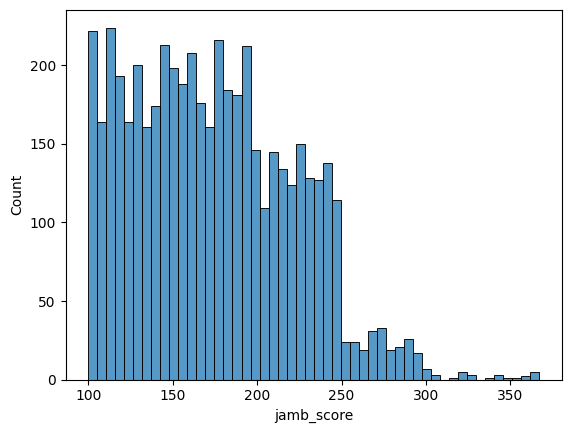

In [9]:
sns.histplot(df.jamb_score, bins=50)

In [10]:
df.dtypes

jamb_score                        int64
study_hours_per_week              int64
attendance_rate                   int64
teacher_quality                   int64
distance_to_school              float64
school_type                      object
school_location                  object
extra_tutorials                  object
access_to_learning_materials     object
parent_involvement               object
it_knowledge                     object
age                               int64
gender                           object
socioeconomic_status             object
parent_education_level           object
assignments_completed             int64
dtype: object

In [11]:
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [12]:
df = df.fillna(0)
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,public,urban,yes,yes,high,medium,17,male,low,tertiary,2
1,207,14,88,4,2.7,public,rural,no,yes,high,high,15,male,high,0,1
2,182,29,87,2,9.6,public,rural,yes,yes,high,medium,20,female,high,tertiary,2
3,210,29,99,2,2.6,public,urban,no,yes,medium,high,22,female,medium,tertiary,1
4,199,12,98,3,8.8,public,urban,no,yes,medium,medium,22,female,medium,tertiary,1


In [13]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

In [16]:
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [17]:
df_train

,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,20,72,3,4.4,public,urban,no,yes,medium,low,21,female,low,0,3
1,11,80,2,3.3,public,urban,yes,yes,medium,high,22,female,medium,secondary,1
2,31,82,1,8.3,public,urban,yes,yes,low,high,19,female,high,tertiary,2
3,29,79,1,15.8,public,rural,yes,yes,low,low,19,male,low,primary,2
4,28,96,2,8.9,private,rural,yes,yes,medium,low,19,male,high,secondary,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,79,3,12.2,public,urban,no,no,low,high,17,male,high,secondary,1
2996,3,87,1,9.6,public,urban,no,no,medium,medium,17,male,medium,primary,1
2997,17,96,4,13.7,private,urban,no,yes,high,medium,16,male,medium,primary,2
2998,25,74,2,3.4,public,rural,no,no,high,high,21,male,low,secondary,1


In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import export_text

In [19]:
train_dicts = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse = True)
X_train = dv.fit_transform(train_dicts)

In [20]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [21]:
print(export_text(dtr, feature_names=list(dv.get_feature_names_out())))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
rfr = RandomForestRegressor(
    n_estimators=10,
    random_state=1,
    n_jobs=-1)

rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [24]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [25]:
y_pred = rfr.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print('RMSE on validation:', rmse)

RMSE on validation: 42.13724207871227


In [76]:
scores =[]

for n in range(10, 201, 10) :
    rfr = RandomForestRegressor(
    n_estimators=n,
    random_state=1,
    n_jobs=-1)

    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_val)
    
    rmse = root_mean_squared_error(y_val, y_pred)
    scores.append((n, round(rmse,3)))

In [78]:
scores

[(10, np.float64(42.137)),
 (20, np.float64(41.461)),
 (30, np.float64(41.106)),
 (40, np.float64(40.917)),
 (50, np.float64(40.852)),
 (60, np.float64(40.784)),
 (70, np.float64(40.677)),
 (80, np.float64(40.539)),
 (90, np.float64(40.504)),
 (100, np.float64(40.517)),
 (110, np.float64(40.593)),
 (120, np.float64(40.625)),
 (130, np.float64(40.651)),
 (140, np.float64(40.595)),
 (150, np.float64(40.597)),
 (160, np.float64(40.604)),
 (170, np.float64(40.628)),
 (180, np.float64(40.641)),
 (190, np.float64(40.631)),
 (200, np.float64(40.601))]

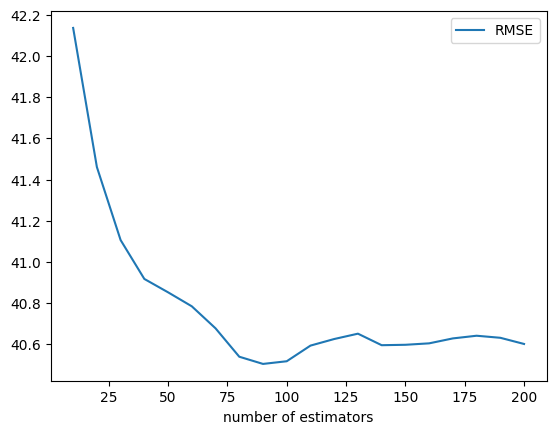

In [79]:
columns = ['n_estimators', 'rmse']
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

plt.plot(df_scores.n_estimators, df_scores.rmse, label="RMSE")
plt.xlabel("number of estimators")
plt.legend()

In [80]:
from tqdm import tqdm
import statistics

In [81]:
scores = []

for d in tqdm([10, 15, 20, 25], desc="Depth"):
    for n in tqdm(range(10, 201, 10), desc=f"Estimators (depth={d})", leave=False):
        rmse_values = []
        rfr = RandomForestRegressor(
            max_depth=d,
            n_estimators=n,
            random_state=1,
            n_jobs=-1
        )
        
        rfr.fit(X_train, y_train)
    
        y_pred = rfr.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        rmse_values.append(rmse)
    scores.append((d, statistics.mean(rmse_values)))

Depth: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [06:37<00:00, 99.36s/it]


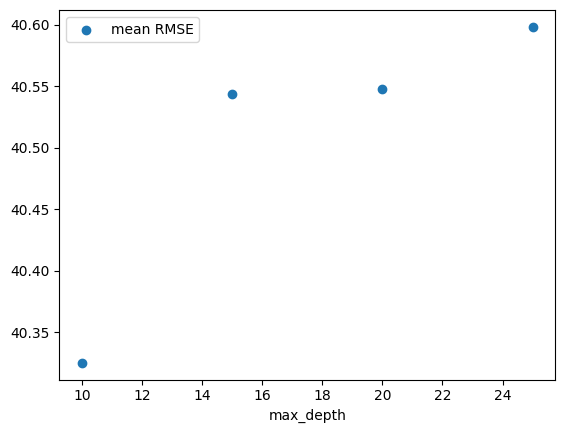

In [82]:
columns = ['max_depth', 'mean_rmse']
df_scores = pd.DataFrame(scores, columns=columns)

plt.scatter(df_scores.max_depth, df_scores.mean_rmse, label="mean RMSE")
plt.xlabel("max_depth")
plt.legend()


In [26]:
rfr = RandomForestRegressor(
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1)

rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [33]:
feature_importances = rfr.feature_importances_
feature_names = dv.get_feature_names_out()

In [36]:
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

In [35]:
print("Features sorted :")
for idx in sorted_indices:
    print(f"{feature_names[idx]}: {feature_importances[idx]}")

Features sorted :
study_hours_per_week: 0.24835361199396536
attendance_rate: 0.1497290297846747
distance_to_school: 0.1364858048632369
teacher_quality: 0.0826822226388016
age: 0.06931145469695398
assignments_completed: 0.03151678945460071
socioeconomic_status=high: 0.025714264343587142
parent_involvement=high: 0.022918852929064194
it_knowledge=high: 0.0177193420394119
parent_education_level=secondary: 0.016956919815100068
parent_education_level=primary: 0.01545036018792814
parent_education_level=tertiary: 0.014488617277194148
extra_tutorials=no: 0.013459336291731934
parent_involvement=low: 0.013357613537934167
it_knowledge=low: 0.012404050525957137
access_to_learning_materials=no: 0.012325395818561702
parent_involvement=medium: 0.011492011642547156
socioeconomic_status=low: 0.010707977461688629
socioeconomic_status=medium: 0.010562682989822823
gender=male: 0.010382634572648446
access_to_learning_materials=yes: 0.010261891957053597
school_location=rural: 0.009559093298481168
gender=fema

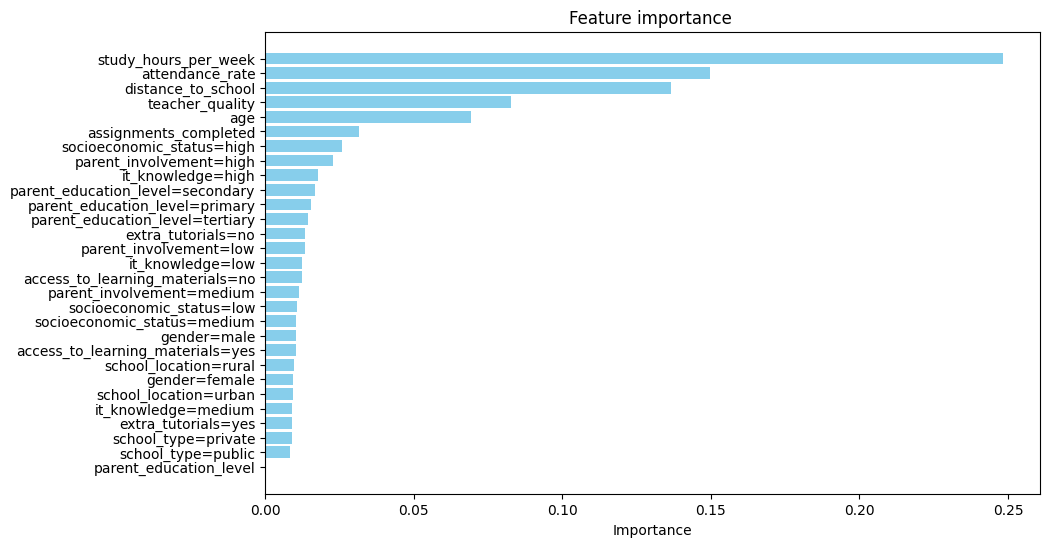

In [42]:
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Feature importance ")
plt.gca().invert_yaxis() 
plt.show()

In [26]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 52.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 49.3 MB/s eta 0:00:00m eta 0:00:010:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [50]:
import xgboost as xgb

In [51]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(data=X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(data=X_val, label=y_val, feature_names=features)

watchlist = [(dtrain, 'train'), (dval, 'val')]

In [52]:
%%capture output_eta_0_3

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, 
                  verbose_eval=5,
                  evals=watchlist)

In [53]:
s = output_eta_0_3.stdout

In [54]:
print(s)

[0]	train-rmse:42.69384	val-rmse:44.89114
[5]	train-rmse:34.57756	val-rmse:40.69096
[10]	train-rmse:31.63404	val-rmse:40.48319
[15]	train-rmse:29.41497	val-rmse:40.86107
[20]	train-rmse:27.49658	val-rmse:41.27921
[25]	train-rmse:26.34353	val-rmse:41.57975
[30]	train-rmse:24.21076	val-rmse:41.72928
[35]	train-rmse:22.46394	val-rmse:42.03417
[40]	train-rmse:21.35340	val-rmse:42.24363
[45]	train-rmse:20.24355	val-rmse:42.27966
[50]	train-rmse:19.25157	val-rmse:42.43824
[55]	train-rmse:18.28398	val-rmse:42.54750
[60]	train-rmse:17.12178	val-rmse:42.64446
[65]	train-rmse:16.41573	val-rmse:42.77416
[70]	train-rmse:15.78314	val-rmse:42.84909
[75]	train-rmse:14.80007	val-rmse:43.00760
[80]	train-rmse:13.96907	val-rmse:43.08250
[85]	train-rmse:13.39102	val-rmse:43.16297
[90]	train-rmse:12.46485	val-rmse:43.25161
[95]	train-rmse:11.95568	val-rmse:43.37919
[99]	train-rmse:11.39140	val-rmse:43.41882



In [61]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [62]:
df_score_eta_0_3 = parse_xgb_output(output_eta_0_3)

In [63]:
%%capture output_eta_0_1

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, 
                  verbose_eval=5,
                  evals=watchlist)

In [64]:
df_score_eta_0_1 = parse_xgb_output(output_eta_0_1)

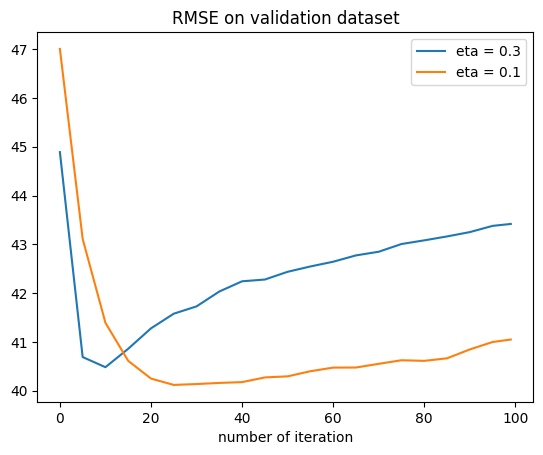

In [70]:
plt.plot(df_score_eta_0_3.num_iter, df_score_eta_0_3.val_rmse, label='eta = 0.3')
plt.plot(df_score_eta_0_1.num_iter, df_score_eta_0_1.val_rmse, label='eta = 0.1')
plt.xlabel("number of iteration")
plt.title("RMSE on validation dataset")
plt.legend()